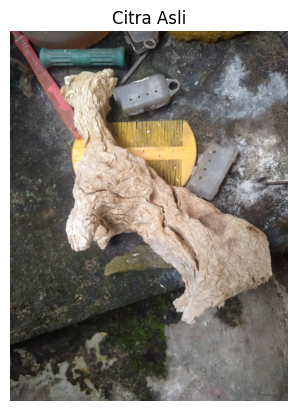

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca citra
image = cv2.imread('goat2.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Tampilkan citra asli
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')  # Menghapus sumbu x dan y pada citra asli
plt.show()

In [ ]:
print(image)

[[[ 23  25  55]
  [ 44  45  79]
  [ 57  55 101]
  ...
  [ 56  53  48]
  [ 72  69  64]
  [ 77  74  69]]

 [[ 19  22  50]
  [ 39  41  72]
  [ 55  52  97]
  ...
  [ 53  50  45]
  [ 60  57  52]
  [ 71  68  63]]

 [[ 18  21  42]
  [ 29  32  60]
  [ 46  45  85]
  ...
  [ 58  55  50]
  [ 57  54  49]
  [ 62  59  54]]

 ...

 [[ 67  83  76]
  [ 62  78  71]
  [ 61  75  69]
  ...
  [ 79  83  84]
  [ 79  83  84]
  [ 79  83  84]]

 [[ 62  78  71]
  [ 57  73  66]
  [ 56  70  64]
  ...
  [ 75  79  80]
  [ 75  79  80]
  [ 76  80  81]]

 [[ 59  77  70]
  [ 56  72  65]
  [ 54  68  62]
  ...
  [ 73  77  78]
  [ 74  78  79]
  [ 76  80  81]]]


In [ ]:
image.shape

(1477, 1108, 3)

In [ ]:
print(gray_img)

[[34 55 69 ... 52 68 73]
 [30 50 66 ... 49 56 67]
 [27 40 57 ... 54 53 58]
 ...
 [79 74 72 ... 83 83 83]
 [74 69 67 ... 79 79 80]
 [73 68 65 ... 77 78 80]]


#1. Contrast Enhancement

##a. Linear Contrast Adjustment

1
254


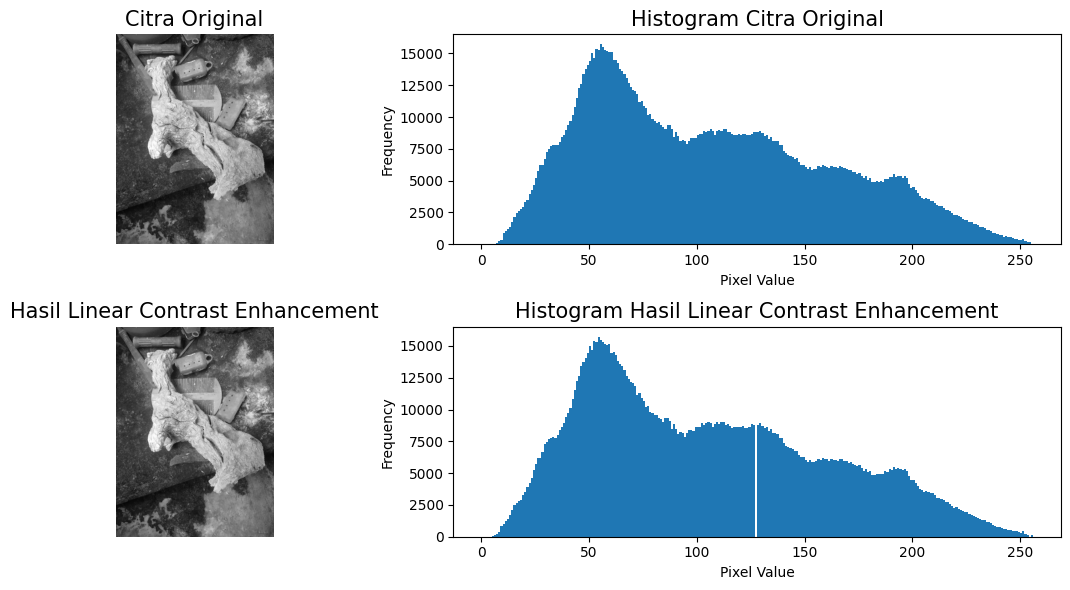

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Read the original image
gray_img = io.imread('goat2.jpg')
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_img)
# Normalize the original image
r = gray_img / 255.0
print(np.min(gray_img))
print(np.max(gray_img))
# Apply linear contrast enhancement
linear_img = ((r - np.min(r)) / (np.max(r) - np.min(r)) * 255).astype(np.uint8)

cv2.imwrite('linear.jpg', linear_img)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Citra Original', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(linear_img, cmap='gray')
plt.title('Hasil Linear Contrast Enhancement', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Original', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(linear_img.ravel(), 256, [0, 256])
plt.title('Histogram Hasil Linear Contrast Enhancement', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


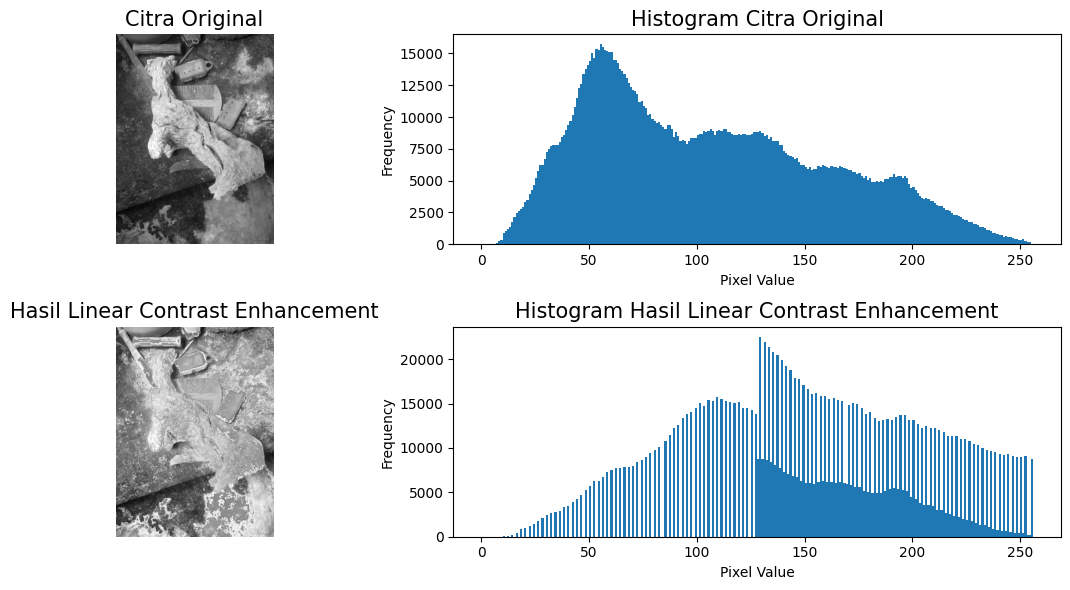

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def piecewise_linear_contrast_adjustment(image, breakpoints):
    adjusted_image = np.copy(image)

    for i in range(len(breakpoints)-1):
        low_bound, high_bound = breakpoints[i], breakpoints[i + 1]
        mask = np.logical_and(adjusted_image >= low_bound, adjusted_image <= high_bound)

        # Apply the specified formula for each breakpoint
        segment_min = np.min(adjusted_image[mask])
        segment_max = np.max(adjusted_image[mask])
        adjusted_image[mask] = ((adjusted_image[mask] - segment_min) / (segment_max - segment_min)) * 255

    return adjusted_image


# Read the original image
gray_img = io.imread('goat2.jpg')
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_img)

breakpoints = [0, 127]

# Perform piece-wise linear contrast adjustment
linear_img = piecewise_linear_contrast_adjustment(gray_img, breakpoints)

cv2.imwrite('linear.jpg', linear_img)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Citra Original', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(linear_img, cmap='gray')
plt.title('Hasil Linear Contrast Enhancement', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Original', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(linear_img.ravel(), 256, [0, 256])
plt.title('Histogram Hasil Linear Contrast Enhancement', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Hitung histogram citra hasil linear contrast enhancement
hist_enhanced, bins = np.histogram(linear_img.ravel(), 256, [0, 256])

# Cari nilai y yang memiliki frekuensi 0
zero_frequency_values = np.where(hist_enhanced == 0)[0]

# Cetak nilai y yang memiliki frekuensi 0
print("Nilai y yang memiliki frekuensi 0 pada histogram hasil linear contrast enhancement:", zero_frequency_values)


Nilai y yang memiliki frekuensi 0 pada histogram hasil linear contrast enhancement: [  1   2   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33
  35  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69
  71  73  75  77  79  81  83  84  86  88  90  92  94  96  98 100 102 104
 106 108 110 112 114 116 118 120 122 124 126]


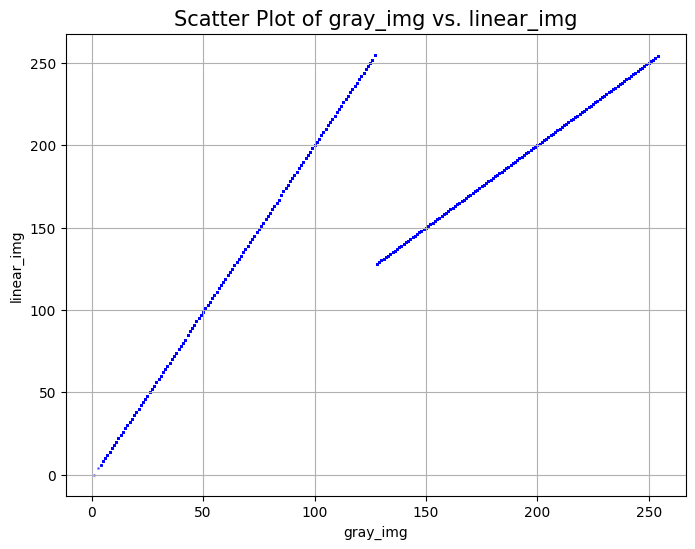

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(gray_img.ravel(), linear_img.ravel(), s=1, c='b', marker='o', alpha=0.5)
plt.title('Scatter Plot of gray_img vs. linear_img', fontsize=15)
plt.xlabel('gray_img')
plt.ylabel('linear_img')
plt.grid(True)

plt.show()

In [ ]:
print(np.sum(gray_img == 127))

8790


In [ ]:
x = 127/255
y = 1/255
z = 254/255
print((x - y) / (z - y) * 255)

126.99604743083005


In [ ]:
print(1 in linear_img)
print(1 in gray_img)

False
True


##b. Nonlinear Contrast Transforms (Gamma)

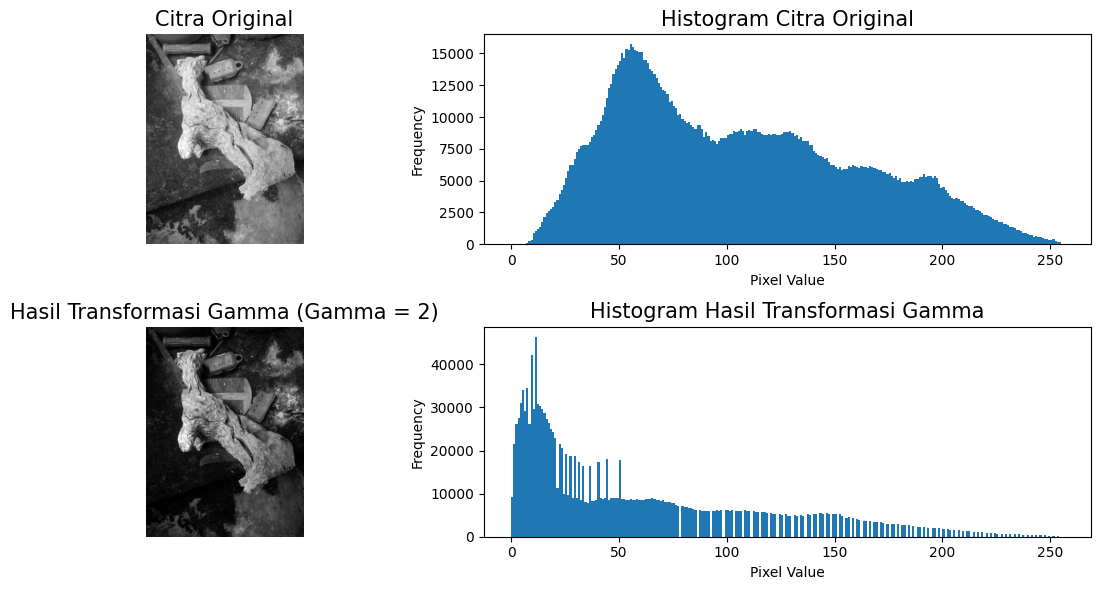

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Read the original image
gray_img = io.imread('goat2.jpg')
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)

# Normalize the original image
normalized_img = gray_img / 255.0

# Define the gamma value (adjust this as needed)
gamma = 2

# Apply gamma correction to enhance contrast non-linearly
enhanced_img = np.power(normalized_img, gamma)
enhanced_img = np.uint8(255 * enhanced_img)
cv2.imwrite('gamma.jpg', enhanced_img)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Citra Original', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(enhanced_img, cmap='gray')
plt.title(f'Hasil Transformasi Gamma (Gamma = {gamma})', fontsize=15)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Original', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(enhanced_img.ravel(), 256, [0, 256])
plt.title('Histogram Hasil Transformasi Gamma', fontsize=15)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


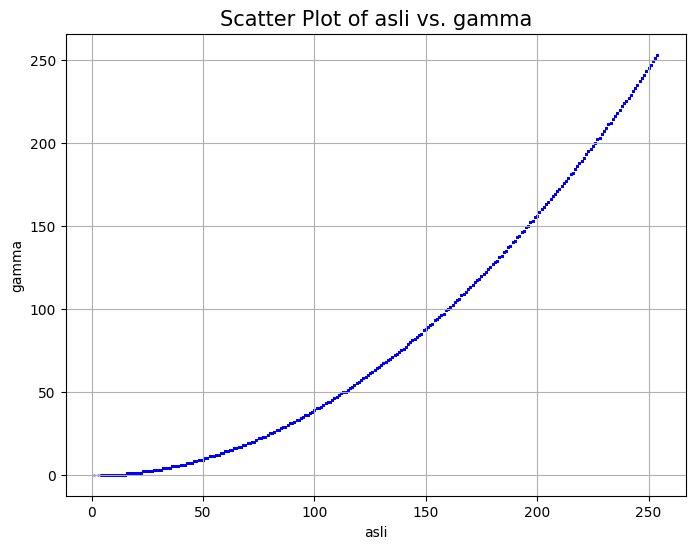

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(gray_img.ravel(), enhanced_img.ravel(), s=1, c='b', marker='o', alpha=0.5)
plt.title('Scatter Plot of asli vs. gamma', fontsize=15)
plt.xlabel('asli')
plt.ylabel('gamma')
plt.grid(True)

plt.show()

In [ ]:
print(255 in enhanced_img)

False


##c. Histogram Equalization

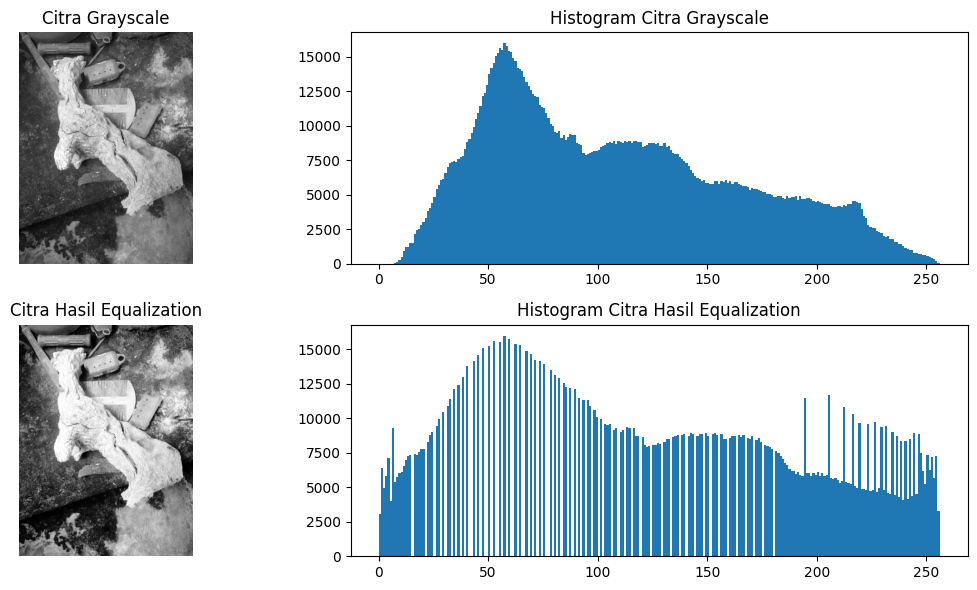

In [ ]:
# Ubah citra ke dalam mode grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)

# Lakukan histogram equalization
equalized_image = cv2.equalizeHist(gray_image)
cv2.imwrite('equalized.jpg', equalized_image)

# Menghapus sumbu x dan y pada citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Citra Grayscale')
plt.axis('off')

# Menghapus sumbu x dan y pada histogram citra grayscale
plt.subplot(2, 2, 2), plt.hist(gray_image.ravel(), 256, [0, 256]), plt.title('Histogram Citra Grayscale')

# Menghapus sumbu x dan y pada citra hasil equalization
plt.subplot(2, 2, 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Citra Hasil Equalization')
plt.axis('off')

# Menghapus sumbu x dan y pada histogram citra hasil equalization
plt.subplot(2, 2, 4), plt.hist(equalized_image.ravel(), 256, [0, 256]), plt.title('Histogram Citra Hasil Equalization')

plt.tight_layout()
plt.show()


In [ ]:
# Hitung rata-rata dan deviasi standar
mean_original = np.mean(image)
std_original = np.std(image)
mean_equalized = np.mean(equalized_image)
std_equalized = np.std(equalized_image)

print(f"Rata-rata Citra Asli: {mean_original}")
print(f"Deviasi Standar Citra Asli: {std_original}")
print(f"Rata-rata Citra Equalization: {mean_equalized}")
print(f"Deviasi Standar Citra Equalization: {std_equalized}")

Rata-rata Citra Asli: 106.34156178939487
Deviasi Standar Citra Asli: 57.449411910725956
Rata-rata Citra Equalization: 128.18812526122568
Deviasi Standar Citra Equalization: 73.4483848781237


##d. Pseudocoloring

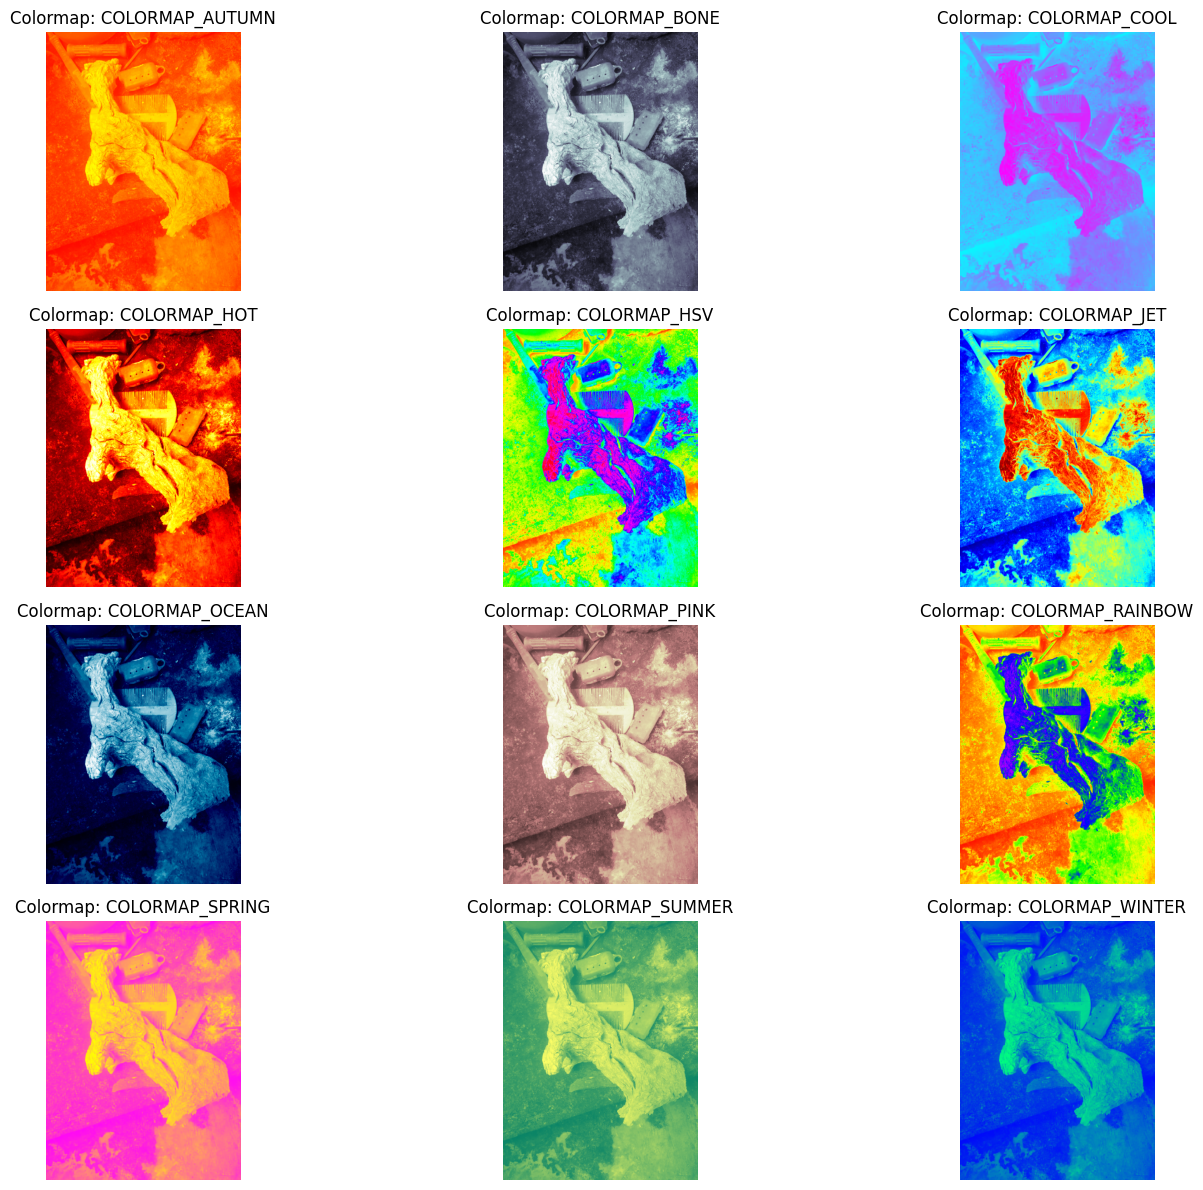

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('goat2.jpg', cv2.IMREAD_GRAYSCALE)

# Define the list of colormaps and their corresponding names
colormap_names = {
    cv2.COLORMAP_AUTUMN: 'COLORMAP_AUTUMN',
    cv2.COLORMAP_BONE: 'COLORMAP_BONE',
    cv2.COLORMAP_COOL: 'COLORMAP_COOL',
    cv2.COLORMAP_HOT: 'COLORMAP_HOT',
    cv2.COLORMAP_HSV: 'COLORMAP_HSV',
    cv2.COLORMAP_JET: 'COLORMAP_JET',
    cv2.COLORMAP_OCEAN: 'COLORMAP_OCEAN',
    cv2.COLORMAP_PINK: 'COLORMAP_PINK',
    cv2.COLORMAP_RAINBOW: 'COLORMAP_RAINBOW',
    cv2.COLORMAP_SPRING: 'COLORMAP_SPRING',
    cv2.COLORMAP_SUMMER: 'COLORMAP_SUMMER',
    cv2.COLORMAP_WINTER: 'COLORMAP_WINTER'
}

# Display the grayscale image with each colormap and its name as title
plt.figure(figsize=(16, 12))
for colormap, colormap_name in colormap_names.items():
    color_mapped_image = cv2.applyColorMap(image, colormap)

    plt.subplot(4, 3, list(colormap_names.keys()).index(colormap) + 1)
    plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Colormap: {colormap_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()


#2. Sharpening and Edge Enhancement

##a. Discrete Difference Operators

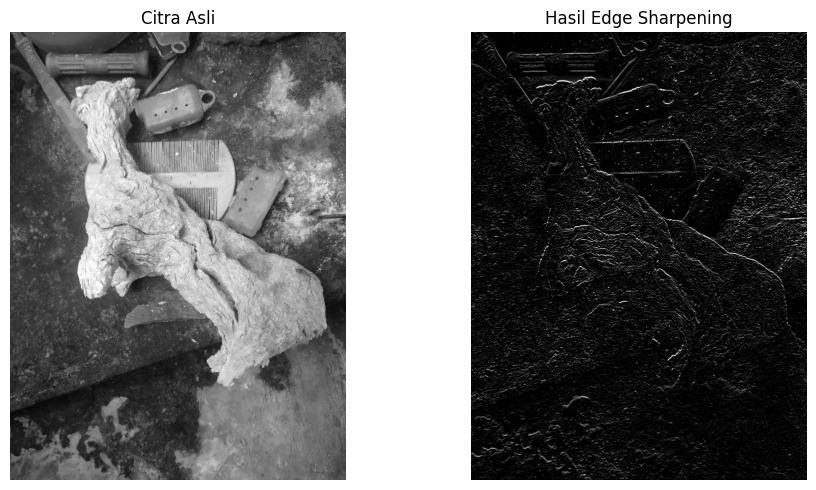

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
input_image = cv2.imread('gray_image.jpg')

# Buat kernel untuk edge sharpening (misalnya, kernel Laplacian)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

prewitt_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

sobel_horizontal_kernel = np.array([[-1, -2, -1],
                                    [0, 0, 0],
                                    [1, 2, 1]])

sobel_vertical_kernel = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

unsharp_masking_kernel = np.array([[-1, -1, -1],
                                   [-1, 9, -1],
                                   [-1, -1, -1]])

# Terapkan filter dengan menggunakan metode filter2D dari OpenCV
sharpened_image = cv2.filter2D(input_image, -1, sobel_horizontal_kernel)  # Ubah kernel untuk mengubah output
cv2.imwrite('sharpened.jpg', sharpened_image)

# Tampilkan citra asli dan citra hasil sharpening
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Hasil Edge Sharpening')
plt.axis('off')

plt.tight_layout()
plt.show()


#3. Noise Suppression

##a. Wideband Noise Suppression (Gaussian)

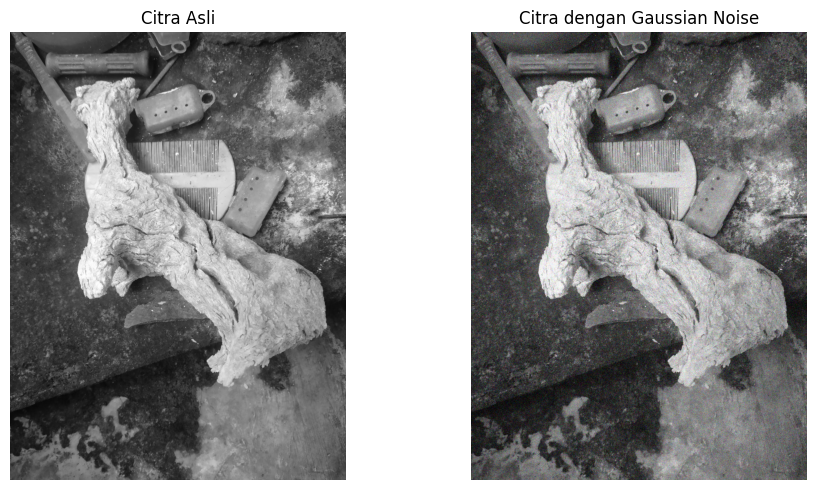

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra asli
original_image = cv2.imread('gray_image.jpg')

# Fungsi untuk menambahkan Gaussian noise ke citra
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

# Tambahkan Gaussian noise
noisy_image = add_gaussian_noise(original_image, mean=0, sigma=25)
cv2.imwrite('gaussian_noise_goat2.jpg', noisy_image)

# Tampilkan citra asli dan citra dengan Gaussian noise
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Citra dengan Gaussian Noise')
plt.axis('off')

plt.tight_layout()
plt.show()


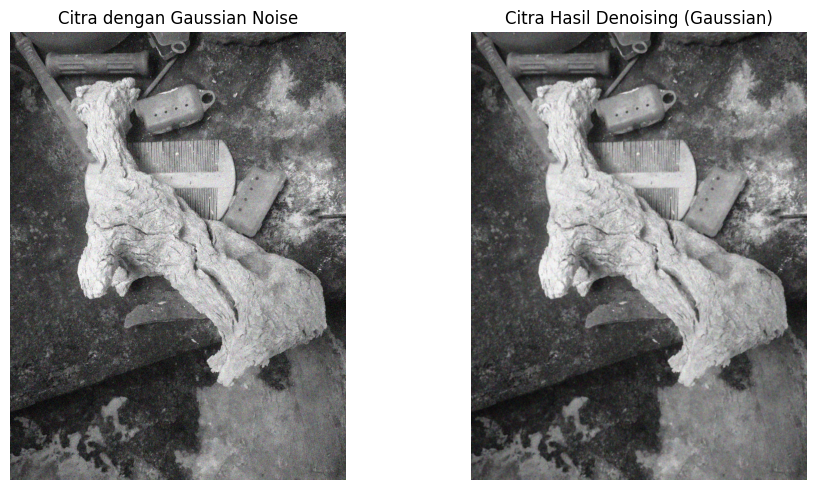

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghilangkan noise dengan filter Gaussian
def denoise_with_gaussian(image):
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised_image

# Baca citra dengan Gaussian noise (hasil dari kode pertama)
noisy_image = cv2.imread('gaussian_noise_goat2.jpg')

# Terapkan filter Gaussian untuk menghilangkan noise
denoised_image = denoise_with_gaussian(noisy_image)
cv2.imwrite('gaussian_denoised_goat2.jpg', denoised_image)

# Tampilkan citra dengan Gaussian noise dan citra hasil denoising
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Citra dengan Gaussian Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Denoising (Gaussian)')
plt.axis('off')

plt.tight_layout()
plt.show()


##b. Impulse Noise Suppression (Salt and Pepper)

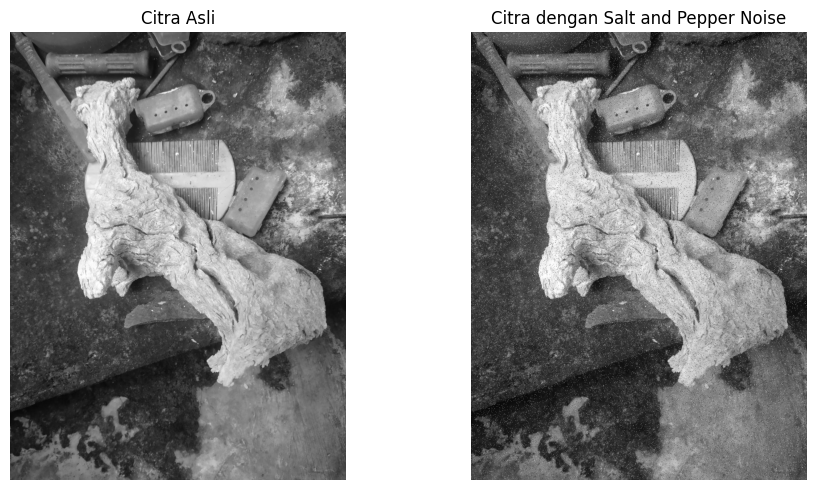

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# Baca citra asli
image = cv2.imread('goat2.jpg', cv2.IMREAD_GRAYSCALE)



# Tambahkan salt and pepper noise dengan probabilitas 0.02 untuk salt dan 0.02 untuk pepper
noisy_image = salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
cv2.imwrite('salt_and_pepper_noise_goat2.jpg', noisy_image)

# Tampilkan citra dengan noise
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Citra dengan Salt and Pepper Noise')
plt.axis('off')

plt.tight_layout()
plt.show()



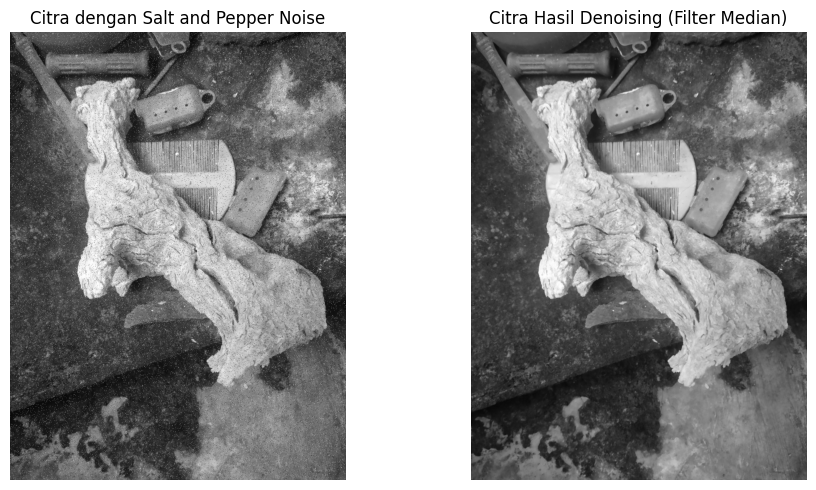

In [ ]:
noisy_image = cv2.imread('salt_and_pepper_noise_goat2.jpg', cv2.IMREAD_GRAYSCALE)

# Noise Suppression Menggunakan Filter Median
denoised_image = cv2.medianBlur(noisy_image, 3)  # 3 adalah ukuran kernel median
cv2.imwrite('salt_and_pepper_denoised_goat2.jpg', denoised_image)
# Tampilkan citra hasil denoising
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Citra dengan Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Denoising (Filter Median)')
plt.axis('off')

plt.tight_layout()
plt.show()


#4. Geometrical Distortion Correction (unfinished)

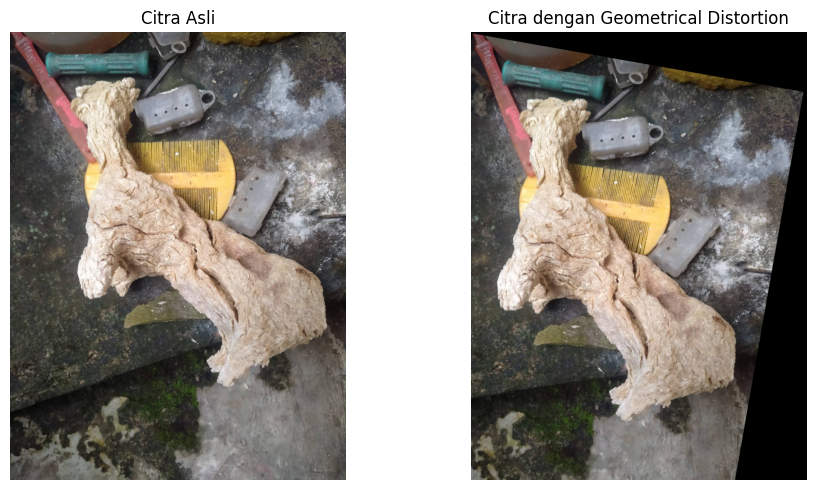

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
image = cv2.imread('goat2.jpg')

# Ambil dimensi citra
height, width, channels = image.shape

# Definisikan matriks transformasi perspektif
# Anda dapat mengganti nilai-nilai matriks ini sesuai dengan kebutuhan
# Di sini, contoh pergeseran dan perputaran sederhana diterapkan
angle = 10  # Sudut rotasi (dalam derajat)
scale = 1  # Faktor skala
tx = 5  # Pergeseran horizontal
ty = 5  # Pergeseran vertikal

# Buat matriks transformasi perspektif
M = np.array([
    [scale * np.cos(np.radians(angle)), -scale * np.sin(np.radians(angle)), tx],
    [scale * np.sin(np.radians(angle)), scale * np.cos(np.radians(angle)), ty],
    [0, 0, 1]
], dtype=np.float32)

# Terapkan geometrical distortion pada citra
distorted_image = cv2.warpPerspective(image, M, (width, height))
cv2.imwrite('distorted_goat2.jpg', distorted_image)

# Tampilkan citra asli dan citra dengan geometrical distortion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title('Citra dengan Geometrical Distortion')
plt.axis('off')

plt.tight_layout()
plt.show()


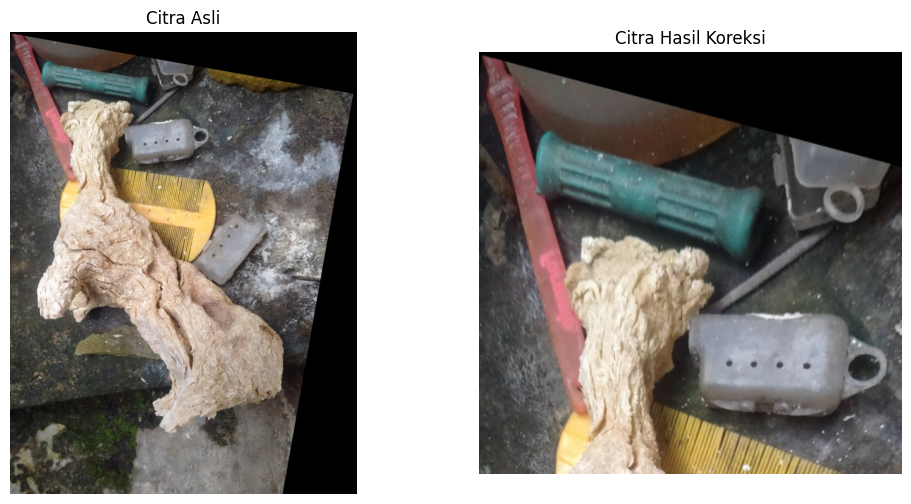

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dengan geometrical distortion
distorted_image = cv2.imread('distorted_goat2.jpg')

# Tentukan titik-titik sudut pada citra asli dan titik-titik sudut yang diharapkan setelah koreksi
original_points = np.array([[0, 0], [0, 500], [500, 0], [500, 500]], dtype=np.float32)
corrected_points = np.array([[0, 0], [0, 500], [500, 0], [400, 600]], dtype=np.float32)

# Hitung matriks transformasi perspektif
matrix = cv2.getPerspectiveTransform(original_points, corrected_points)

# Terapkan transformasi perspektif pada citra
corrected_image = cv2.warpPerspective(distorted_image, matrix, (600, 600))
cv2.imwrite('corrected_goat2.jpg', corrected_image)

# Tampilkan citra asli dan citra hasil koreksi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Koreksi')
plt.axis('off')

plt.show()


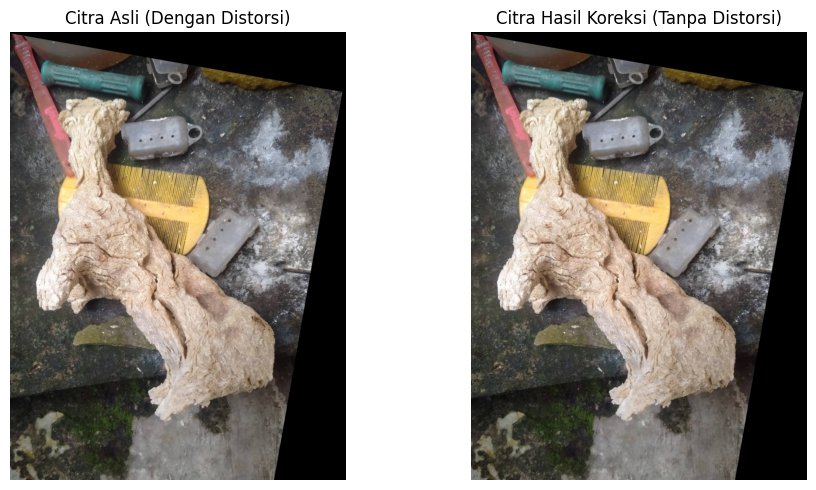

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dengan geometrical distortion
distorted_image = cv2.imread('distorted_goat2.jpg')

# Tentukan titik-titik sudut pada citra asli dan titik-titik sudut yang diharapkan setelah koreksi
original_points = np.array([[0, 0], [0, 500], [500, 0], [500, 500]], dtype=np.float32)
corrected_points = np.array([[0, 0], [0, 500], [500, 0], [500, 500]], dtype=np.float32)

# Hitung matriks transformasi perspektif
matrix = cv2.getPerspectiveTransform(original_points, corrected_points)

# Terapkan transformasi perspektif untuk mengoreksi distorsi
height, width, channels = distorted_image.shape
corrected_image = cv2.warpPerspective(distorted_image, matrix, (width, height))


# Tampilkan citra asli dan citra hasil koreksi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli (Dengan Distorsi)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Koreksi (Tanpa Distorsi)')
plt.axis('off')

plt.tight_layout()
plt.show()


#Coba-coba

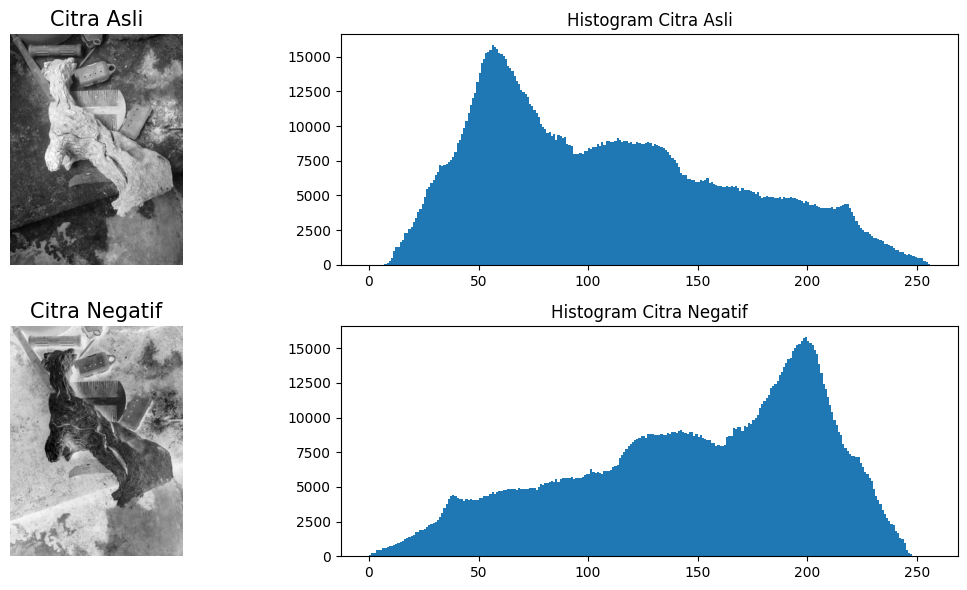

In [ ]:
from skimage import color, io, util
import matplotlib.pyplot as plt

# Membaca citra dan mengonversinya menjadi citra grayscale
gray_img = util.img_as_ubyte(color.rgb2gray(io.imread('goat2.jpg')))

# Membuat citra negatif
neg_img = 255 - gray_img
cv2.imwrite('negative.jpg', neg_img)

# Membuat gambar subplot
gray_image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Tampilkan histogram citra asli
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Asli')

# Tampilkan histogram citra hasil negatif
plt.subplot(2, 2, 4)
plt.hist(neg_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Negatif')

# Tampilkan citra asli
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Citra Asli', fontsize=15)
plt.axis("off")

# Tampilkan citra negatif
plt.subplot(2, 2, 3)
plt.imshow(neg_img, cmap='gray')
plt.title('Citra Negatif', fontsize=15)
plt.axis("off")

plt.tight_layout()
plt.show()


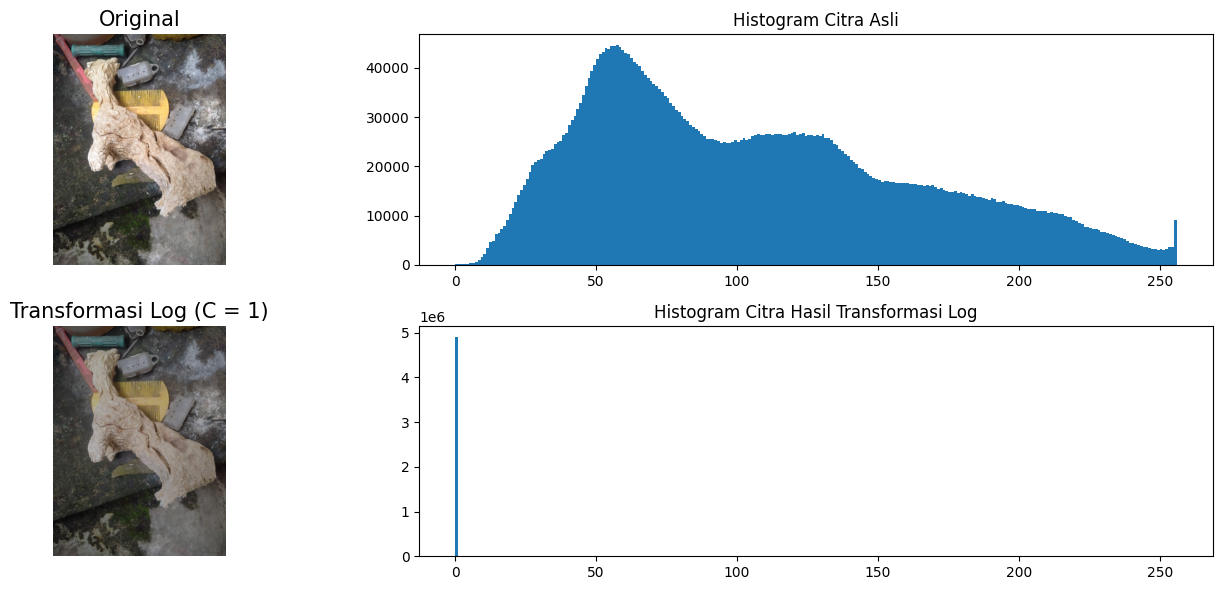

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
gray_img = io.imread('goat2.jpg')

# Normalisasi citra asli
r = gray_img / 255
c = 1

# Transformasi log
log_img = c * np.log(1 + r)
plt.imsave('log.jpg', log_img)

# Menampilkan citra dan histogram
plt.figure(figsize=(15, 6))

# Subplot 1: Citra asli
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original', fontsize=15)
plt.axis("off")

# Subplot 2: Histogram citra asli
plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Asli')

# Subplot 3: Citra hasil transformasi log
plt.subplot(2, 2, 3)
plt.imshow(log_img, cmap='gray')
plt.title(f'Transformasi Log (C = {c})', fontsize=15)
plt.axis("off")

# Subplot 4: Histogram citra hasil transformasi log
plt.subplot(2, 2, 4)
plt.hist(log_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Hasil Transformasi Log')

plt.tight_layout()
plt.show()


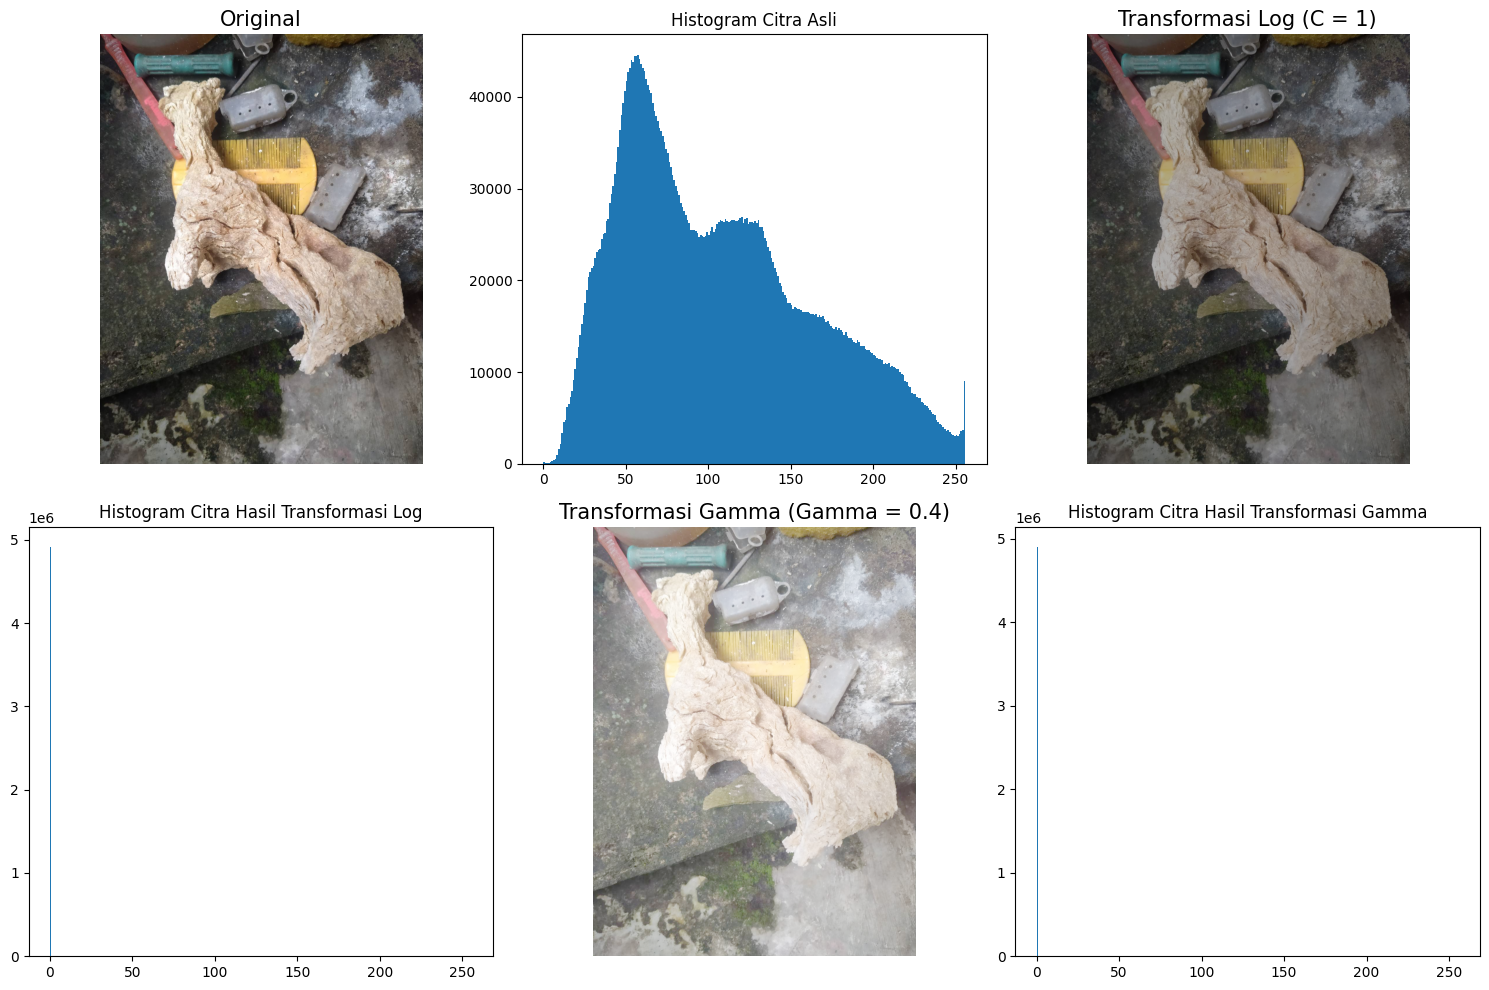

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Membaca citra asli
gray_img = io.imread('goat2.jpg')

# Normalisasi citra asli
r = gray_img / 255

# Transformasi log
c_log = 1
log_img = c_log * np.log(1 + r)

# Menyimpan citra hasil transformasi log
plt.imsave('log.jpg', log_img, cmap='gray')

# Transformasi gamma
c_gamma = 1
gamma_val = 0.4
gamma_img = c_gamma * (r ** gamma_val)

# Menyimpan citra hasil transformasi gamma
plt.imsave('gamma.jpg', gamma_img, cmap='gray')

# Menampilkan citra dan histogram
plt.figure(figsize=(15, 10))

# Subplot 1: Citra asli
plt.subplot(2, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original', fontsize=15)
plt.axis("off")

# Subplot 2: Histogram citra asli
plt.subplot(2, 3, 2)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Asli')

# Subplot 3: Citra hasil transformasi log
plt.subplot(2, 3, 3)
plt.imshow(log_img, cmap='gray')
plt.title(f'Transformasi Log (C = {c_log})', fontsize=15)
plt.axis("off")

# Subplot 4: Histogram citra hasil transformasi log
plt.subplot(2, 3, 4)
plt.hist(log_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Hasil Transformasi Log')

# Subplot 5: Citra hasil transformasi gamma
plt.subplot(2, 3, 5)
plt.imshow(gamma_img, cmap='gray')
plt.title(f'Transformasi Gamma (Gamma = {gamma_val})', fontsize=15)
plt.axis("off")

# Subplot 6: Histogram citra hasil transformasi gamma
plt.subplot(2, 3, 6)
plt.hist(gamma_img.ravel(), 256, [0, 256])
plt.title('Histogram Citra Hasil Transformasi Gamma')

plt.tight_layout()
plt.show()
